In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'

In [ ]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
def is_cat(x): return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 39.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.175779,0.026928,0.008119,40:43


epoch,train_loss,valid_loss,error_rate,time


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-4b9dee10b079>", line 2, in <cell line: 2>
    learn.fine_tune(1)
  File "/usr/local/lib/python3.10/dist-packages/fastai/callback/schedule.py", line 170, in fine_tune
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/fastai/callback/schedule.py", line 121, in fit_one_cycle
    self.fit(n_epoch, cbs=ParamScheduler(scheds)+L(cbs), reset_opt=reset_opt, wd=wd, start_epoch=start_epoch)
  File "/usr/local/lib/python3.10/dist-packages/fastai/learner.py", line 266, in fit
    self._with_events(self._do_fit, 'fit', CancelFitException, self._end_cleanup)
  File "/usr/local/lib/python3.10/dist-packages/fastai/learner.py", line 201, in _with_events
    try: self(f'before_{event_type


KeyboardInterrupt



In [ ]:
path = untar_data(URLs.CAMVID_TINY)

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 72.8MB/s]


epoch,train_loss,valid_loss,time
0,2.992511,2.402122,00:02


epoch,train_loss,valid_loss,time
0,1.754135,1.449244,00:01
1,1.554127,1.539986,00:01
2,1.445120,1.133968,00:01
3,1.369963,1.139748,00:01
4,1.273993,0.969069,00:01
5,1.174529,0.900150,00:01
6,1.084769,0.840519,00:01
7,1.011341,0.824373,00:01


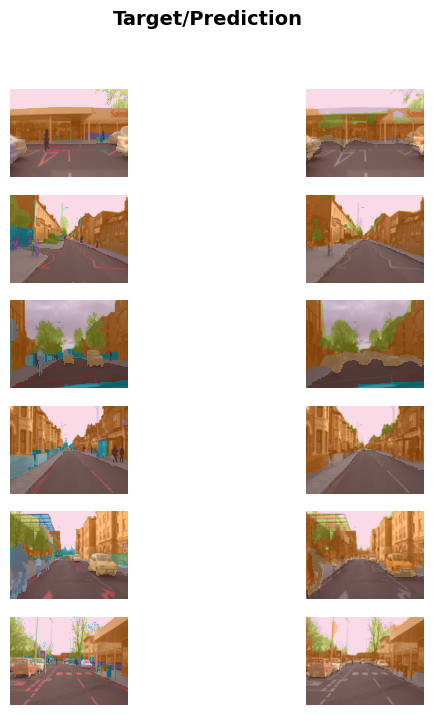

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
learn.predict("I really liked that movie!")
learn.export('model.pkl')
learn

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,0.469031,0.393677,0.821200,03:23


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.307208,0.249948,0.898800,07:09
1,0.248277,0.279685,0.879000,07:09
2,0.184016,0.194850,0.925640,07:09
3,0.142407,0.197695,0.926720,07:09


In [ ]:
00

0

In [ ]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataloaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                                  cont_names = ['age', 'fnlwgt', 'education-num'],
                                  pros = [Categorify, FillMissing, Normalize])


SyntaxError: incomplete input (<ipython-input-9-949861d7706d>, line 9)

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

In [ ]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))

In [ ]:
learn.fine_tune(10)

In [ ]:
learn.show_results()